# Example notebook testing effective elastic properties calculator

Initialize

In [1]:
from context import elasticc as el
import numpy as np
import matplotlib.pyplot as plt

# Almost zero. This is needed to avoid some division by zero.
# Need a better solution
zero = 1e-12

# Set up components using values from Montserrat
# Granite at 800 MPa from Christensen and Stanley
vp1=6.352
vs1=3.706
ro1=2.652


vp2=2.400
vs2=zero
ro2=2.550


# Moduli of crystals
K1 = ro1*(vp1**2.-4./3.*vs1**2.)
print(K1)
G1 = ro1*vs1**2.
print(G1)

# Moduli of melt
K2 = ro2*vp2**2  #1.27e1
G2 = zero

dir(el)


58.43767571200002
36.423724272


['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'constants',
 'critical',
 'eep',
 'limits',
 'utils']

In [2]:
# Initialize volume fractions (melt fraction from 0 to 1)
dc = 5e-3
nc = int(1./dc-1)
c2 = np.linspace(dc,dc*nc,nc)
c1 = 1-c2

# Calculate density of composity as function of melt fraction
roe = el.limits.Voigt(ro1,c1,ro2,c2)
print(roe)

[2.65149 2.65098 2.65047 2.64996 2.64945 2.64894 2.64843 2.64792 2.64741
 2.6469  2.64639 2.64588 2.64537 2.64486 2.64435 2.64384 2.64333 2.64282
 2.64231 2.6418  2.64129 2.64078 2.64027 2.63976 2.63925 2.63874 2.63823
 2.63772 2.63721 2.6367  2.63619 2.63568 2.63517 2.63466 2.63415 2.63364
 2.63313 2.63262 2.63211 2.6316  2.63109 2.63058 2.63007 2.62956 2.62905
 2.62854 2.62803 2.62752 2.62701 2.6265  2.62599 2.62548 2.62497 2.62446
 2.62395 2.62344 2.62293 2.62242 2.62191 2.6214  2.62089 2.62038 2.61987
 2.61936 2.61885 2.61834 2.61783 2.61732 2.61681 2.6163  2.61579 2.61528
 2.61477 2.61426 2.61375 2.61324 2.61273 2.61222 2.61171 2.6112  2.61069
 2.61018 2.60967 2.60916 2.60865 2.60814 2.60763 2.60712 2.60661 2.6061
 2.60559 2.60508 2.60457 2.60406 2.60355 2.60304 2.60253 2.60202 2.60151
 2.601   2.60049 2.59998 2.59947 2.59896 2.59845 2.59794 2.59743 2.59692
 2.59641 2.5959  2.59539 2.59488 2.59437 2.59386 2.59335 2.59284 2.59233
 2.59182 2.59131 2.5908  2.59029 2.58978 2.58927 2.5

# General bounds

In [3]:
# Reuss bounds
Kr = el.limits.Reuss(K1,c1,K2,c2)
Gr = el.limits.Reuss(K1,c1,K2,c2)
Vpr = np.sqrt((Kr+4.0/3.0*Gr)/roe)
Vsr = np.sqrt(Gr/roe)


# Voight
Kv = el.limits.Voigt(K1,c1,K2,c2)
Gv = el.limits.Voigt(K1,c1,K2,c2)
Vpv = np.sqrt((Kv+4.0/3.0*Gv)/roe)
Vsv = np.sqrt(Gv/roe)

# Hashin-Shtrikman
Khs1,Ghs1 = el.limits.hs_bounds(K1,K2,G1,G2,c1,c2)
Khs2,Ghs2 = el.limits.hs_bounds(K2,K1,G2,G1,c2,c1)
Vphs1 = np.sqrt((Khs1+4.0/3.0*Ghs1)/roe)
Vshs1 = np.sqrt(Ghs1/roe)
Vphs2 = np.sqrt((Khs2+4.0/3.0*Ghs2)/roe)
Vshs2 = np.sqrt(Ghs2/roe)


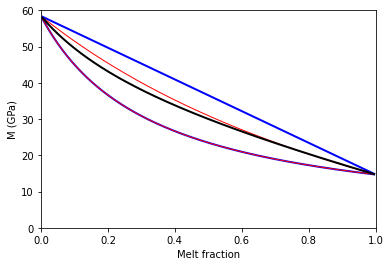

In [4]:
# Plot bounds
pmin=0
pmax=1

fig = plt.figure()
plt.xlabel('Melt fraction')
plt.ylabel('M (GPa)')
plt.xlim(pmin,pmax)
plt.ylim(0,60)

plt.plot(c2,Khs1,lw='1',c='r')
plt.plot(c2,Kv,lw='2',c='b')
plt.plot(c2,Kr,lw='2',c='b')
plt.plot(c2,Khs2,lw='1',c='r')

# Voigt-Reuss-Hill average
plt.plot(c2,(Kr+Kv)/2,lw='2',c='k')

plt.show()

# Test symmetric self consistent approximation as described by Berryman (1980)

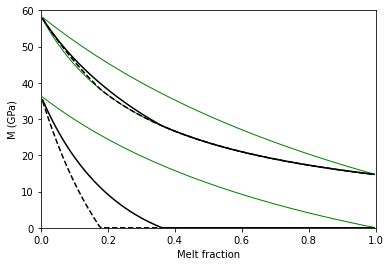

In [5]:
# Aspect ratio of two phases
a1=1
a2=0.05
# Unrelaxed, high frequency limit
b1_Ku1,b1_Gu1 = el.eep.mod_b(K1,K2,G1,G2,a1,a2,c1,c2)
b1_Vpu1=np.sqrt((b1_Ku1+4.0/3.0*b1_Gu1)/roe)
b1_Vsu1=np.sqrt(b1_Gu1/roe)
# Relaxed, low frequency limit
# Calculate dry moduli first (void fill)
K,G = el.eep.mod_b(K1,0.0,G1,0.0,a1,a2,c1,c2)
# Then use Gassman's fluid substitution
b1_Kr1,b1_Gr1 = el.eep.gassman_2(K,G,K1,G1,K2,G2,c2)
b1_Vpr1=np.sqrt((b1_Kr1+4.0/3.0*b1_Gr1)/roe)
b1_Vsr1=np.sqrt(b1_Gr1/roe)


a1=1
a2=0.2
# Unrelaxed, high frequency limit
b2_Ku1,b2_Gu1 = el.eep.mod_b(K1,K2,G1,G2,a1,a2,c1,c2)
b2_Vpu1=np.sqrt((b2_Ku1+4.0/3.0*b2_Gu1)/roe)
b2_Vsu1=np.sqrt(b2_Gu1/roe)
# Relaxed, low frequency limit
# Calculate dry moduli first (void fill)
K,G = el.eep.mod_b(K1,0.0,G1,0.0,a1,a2,c1,c2)
# Then use Gassman's fluid substitution
b2_Kr1,b2_Gr1 = el.eep.gassman_2(K,G,K1,G1,K2,G2,c2)
b2_Vpr1=np.sqrt((b2_Kr1+4.0/3.0*b2_Gr1)/roe)
b2_Vsr1=np.sqrt(b2_Gr1/roe)

a1=1
a2=1
# Unrelaxed, high frequency limit
b3_Ku1,b3_Gu1 = el.eep.mod_b(K1,K2,G1,G2,a1,a2,c1,c2)
b3_Vpu1=np.sqrt((b3_Ku1+4.0/3.0*b3_Gu1)/roe)
b3_Vsu1=np.sqrt(b3_Gu1/roe)
# Relaxed, low frequency limit
# Calculate dry moduli first (void fill)
K,G = el.eep.mod_b(K1,0.0,G1,0.0,a1,a2,c1,c2)
# Then use Gassman's fluid substitution
b3_Kr1,b3_Gr1 = el.eep.gassman_2(K,G,K1,G1,K2,G2,c2)
b3_Vpr1=np.sqrt((b3_Kr1+4.0/3.0*b3_Gr1)/roe)
b3_Vsr1=np.sqrt(b3_Gr1/roe)




pmin=0
pmax=1
fig = plt.figure()
plt.xlabel('Melt fraction')
plt.ylabel('M (GPa)')
plt.xlim(pmin,pmax)
plt.ylim(0,60)
plt.plot(c2,Khs1,lw='1',c='g')
plt.plot(c2,Khs2,lw='1',c='g')
plt.plot(c2,Ghs1,lw='1',c='g')
plt.plot(c2,Ghs2,lw='1',c='g')
plt.plot(c2,b1_Ku1,c='black',linewidth=1.5)
plt.plot(c2,b1_Kr1,c='black',linestyle='--',linewidth=1.5)
plt.plot(c2,b1_Gu1,c='black',linewidth=1.5)
plt.plot(c2,b1_Gr1,c='black',linestyle='--',linewidth=1.5)
plt.show()

# Test differential effective medium approximation

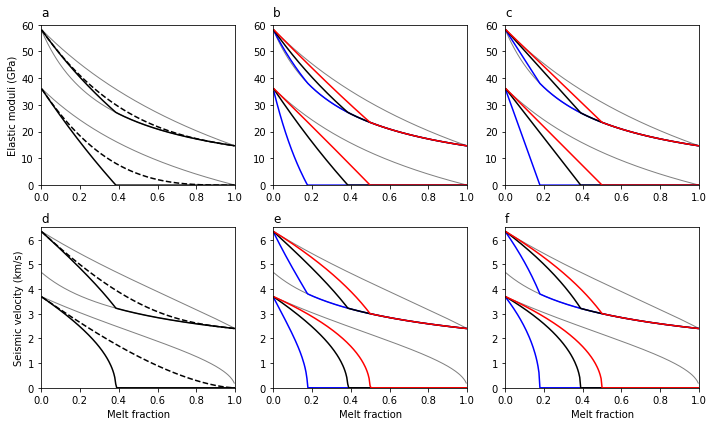

In [10]:
# Aspect ratio of two phases
a2=0.2
# Unrelaxed, high frequency limit
a_Ku1,a_Gu1 = el.eep.dem(K1,K2,G1,G2,a2,c2)
a_Vpu1=np.sqrt((a_Ku1+4.0/3.0*a_Gu1)/roe)
a_Vsu1=np.sqrt(a_Gu1/roe)
# Relaxed, low frequency limit
# Calculate dry moduli first (void fill)
K,G = el.eep.dem(K1,0.0,G1,0.0,a2,c2)
# Then use Gassman's fluid substitution
a_Kr1,a_Gr1 = el.eep.gassman_2(K,G,K1,G1,K2,G2,c2)
a_Vpr1=np.sqrt((a_Kr1+4.0/3.0*a_Gr1)/roe)
a_Vsr1=np.sqrt(a_Gr1/roe)

pmin=0
pmax=1


fig = plt.figure(figsize=(10,6))

plt.subplot(231)
plt.ylabel('Elastic moduli (GPa)')
plt.xlim(pmin,pmax)
plt.ylim(0,60)
plt.plot(c2,Khs1,lw='1',c='gray')
plt.plot(c2,Khs2,lw='1',c='gray')
plt.plot(c2,Ghs1,lw='1',c='gray')
plt.plot(c2,Ghs2,lw='1',c='gray')
plt.plot(c2,a_Kr1,c='black',linestyle='--',linewidth=1.5)
plt.plot(c2,a_Gr1,c='black',linestyle='--',linewidth=1.5)
plt.plot(c2,b2_Kr1,c='black',linestyle='-',linewidth=1.5)
plt.plot(c2,b2_Gr1,c='black',linestyle='-',linewidth=1.5)
plt.text(0, 62, "a", fontsize=12, va="bottom", ha="left")


plt.subplot(232)
plt.xlim(pmin,pmax)
plt.ylim(0,60)
plt.plot(c2,Khs1,lw='1',c='gray')
plt.plot(c2,Khs2,lw='1',c='gray')
plt.plot(c2,Ghs1,lw='1',c='gray')
plt.plot(c2,Ghs2,lw='1',c='gray')
plt.plot(c2,b1_Kr1,c='blue',linestyle='-',linewidth=1.5)
plt.plot(c2,b1_Gr1,c='blue',linestyle='-',linewidth=1.5)
plt.plot(c2,b2_Kr1,c='black',linestyle='-',linewidth=1.5)
plt.plot(c2,b2_Gr1,c='black',linestyle='-',linewidth=1.5)
plt.plot(c2,b3_Kr1,c='red',linestyle='-',linewidth=1.5)
plt.plot(c2,b3_Gr1,c='red',linestyle='-',linewidth=1.5)
plt.text(0, 62, "b", fontsize=12, va="bottom", ha="left")

# Critical porosity
c1_Kr1,c1_Gr1 = el.critical.mod_c(K1,K2,G1,G2,0.18,c2)
c2_Kr1,c2_Gr1 = el.critical.mod_c(K1,K2,G1,G2,0.39,c2)
c3_Kr1,c3_Gr1 = el.critical.mod_c(K1,K2,G1,G2,0.5,c2)
c1_Vpr1=np.sqrt((c1_Kr1+4.0/3.0*c1_Gr1)/roe)
c1_Vsr1=np.sqrt(c1_Gr1/roe)
c2_Vpr1=np.sqrt((c2_Kr1+4.0/3.0*c2_Gr1)/roe)
c2_Vsr1=np.sqrt(c2_Gr1/roe)
c3_Vpr1=np.sqrt((c3_Kr1+4.0/3.0*c3_Gr1)/roe)
c3_Vsr1=np.sqrt(c3_Gr1/roe)

plt.subplot(233)
plt.xlim(pmin,pmax)
plt.ylim(0,60)
plt.plot(c2,Khs1,lw='1',c='gray')
plt.plot(c2,Khs2,lw='1',c='gray')
plt.plot(c2,Ghs1,lw='1',c='gray')
plt.plot(c2,Ghs2,lw='1',c='gray')
plt.plot(c2,c1_Kr1,c='blue',linestyle='-',linewidth=1.5)
plt.plot(c2,c1_Gr1,c='blue',linestyle='-',linewidth=1.5)
plt.plot(c2,c2_Kr1,c='black',linestyle='-',linewidth=1.5)
plt.plot(c2,c2_Gr1,c='black',linestyle='-',linewidth=1.5)
plt.plot(c2,c3_Kr1,c='red',linestyle='-',linewidth=1.5)
plt.plot(c2,c3_Gr1,c='red',linestyle='-',linewidth=1.5)
plt.text(0, 62, "c", fontsize=12, va="bottom", ha="left")

plt.subplot(234)
plt.xlabel('Melt fraction')
plt.ylabel('Seismic velocity (km/s)')
plt.xlim(pmin,pmax)
plt.ylim(0,6.5)
plt.plot(c2,Vphs1,lw='1',c='gray')
plt.plot(c2,Vphs2,lw='1',c='gray')
plt.plot(c2,Vshs1,lw='1',c='gray')
plt.plot(c2,Vshs2,lw='1',c='gray')
plt.plot(c2,a_Vpr1,c='black',linestyle='--',linewidth=1.5)
plt.plot(c2,a_Vsr1,c='black',linestyle='--',linewidth=1.5)
plt.plot(c2,b2_Vpr1,c='black',linestyle='-',linewidth=1.5)
plt.plot(c2,b2_Vsr1,c='black',linestyle='-',linewidth=1.5)
plt.text(0, 6.6, "d", fontsize=12, va="bottom", ha="left")

plt.subplot(235)
plt.xlabel('Melt fraction')
plt.xlim(pmin,pmax)
plt.ylim(0,6.5)
plt.plot(c2,Vphs1,lw='1',c='gray')
plt.plot(c2,Vphs2,lw='1',c='gray')
plt.plot(c2,Vshs1,lw='1',c='gray')
plt.plot(c2,Vshs2,lw='1',c='gray')
plt.plot(c2,b1_Vpr1,c='blue',linestyle='-',linewidth=1.5)
plt.plot(c2,b1_Vsr1,c='blue',linestyle='-',linewidth=1.5)
plt.plot(c2,b2_Vpr1,c='black',linestyle='-',linewidth=1.5)
plt.plot(c2,b2_Vsr1,c='black',linestyle='-',linewidth=1.5)
plt.plot(c2,b3_Vpr1,c='red',linestyle='-',linewidth=1.5)
plt.plot(c2,b3_Vsr1,c='red',linestyle='-',linewidth=1.5)
plt.text(0, 6.6, "e", fontsize=12, va="bottom", ha="left")


plt.subplot(236)
plt.xlabel('Melt fraction')
plt.xlim(pmin,pmax)
plt.ylim(0,6.5)
plt.plot(c2,Vphs1,lw='1',c='gray')
plt.plot(c2,Vphs2,lw='1',c='gray')
plt.plot(c2,Vshs1,lw='1',c='gray')
plt.plot(c2,Vshs2,lw='1',c='gray')
plt.plot(c2,c1_Vpr1,c='blue',linestyle='-',linewidth=1.5)
plt.plot(c2,c1_Vsr1,c='blue',linestyle='-',linewidth=1.5)
plt.plot(c2,c2_Vpr1,c='black',linestyle='-',linewidth=1.5)
plt.plot(c2,c2_Vsr1,c='black',linestyle='-',linewidth=1.5)
plt.plot(c2,c3_Vpr1,c='red',linestyle='-',linewidth=1.5)
plt.plot(c2,c3_Vsr1,c='red',linestyle='-',linewidth=1.5)
plt.text(0, 6.6, "f", fontsize=12, va="bottom", ha="left")

fig.tight_layout(pad=1.0)

plt.show()
fig.savefig("Fig_4_vp.pdf")
